C:\Users\User\AppData\Local\Temp\ipykernel_3864\4150322551.py:78: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


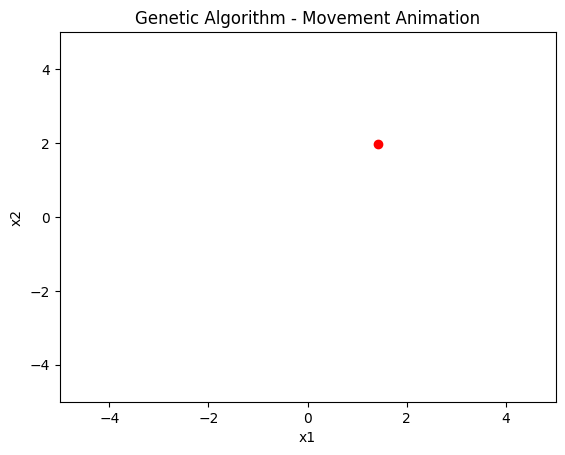

C:\Users\User\AppData\Local\Temp\ipykernel_3864\4150322551.py:110: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


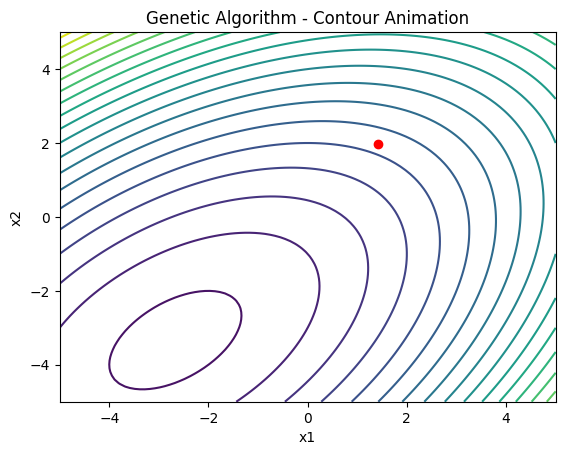

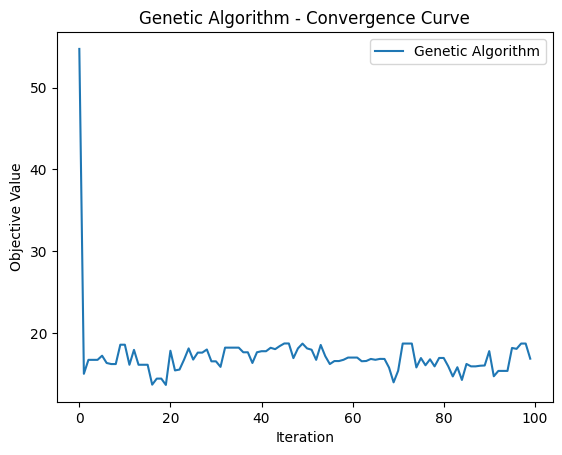


Genetic Algorithm:
Final Solution: [0.75035568 1.9793201 ]
Best Objective Value: 16.860481497904885


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def objective_function(X):
    if len(X) < 2:
        raise ValueError("Objective function requires at least 2 variables.")
    return X[0]**2 - X[0]*X[1] + X[1]**2 + 2*X[0] + 4*X[1] + 3

# Genetic Algorithm (GA)
def real_to_binary(real_solution, search_space, precision=8):
    decimal_value = int((real_solution - search_space[0]) / (search_space[1] - search_space[0]) * (2**precision - 1))
    binary_str = np.binary_repr(decimal_value, width=precision)
    return np.array(list(map(int, binary_str)))

def binary_to_real(binary_solution, search_space):
    binary_str = ''.join(map(str, binary_solution))
    decimal_value = int(binary_str, 2)
    real_value = search_space[0] + (search_space[1] - search_space[0]) * decimal_value / (2**len(binary_solution) - 1)
    return np.array([real_value])

def ga_fitness(real_solution, search_space):
    if len(real_solution) < 2:
        raise ValueError("Objective function requires at least 2 variables.")
    return -objective_function(real_solution)  # Note the negation here

def genetic_algorithm(search_space, population_size, generations, mutation_rate):
    population = np.random.uniform(search_space[0], search_space[1], size=(population_size, 2))
    history = []

    for generation in range(generations):
        fitness_values = np.array([ga_fitness(individual, search_space) for individual in population])
        best_individual_idx = np.argmin(fitness_values)  # Menggunakan argmin karena kita mencari nilai minimum (proses minimisasi)
        best_individual = population[best_individual_idx]

        history.append((best_individual.copy(), -fitness_values[best_individual_idx]))

        # Tournament selection
        parents = []
        for _ in range(population_size // 2):
            tournament_indices = np.random.choice(population_size, size=2)
            selected_parents = population[tournament_indices[np.argmin(fitness_values[tournament_indices])]]
            parents.extend([selected_parents])  # Ubah selected_parents menjadi list

        # Crossover (single-point crossover)
        crossover_point = np.random.randint(1, len(parents[0]))
        for i in range(0, len(parents), 2):
            crossover_mask = np.zeros(len(parents[i]))
            crossover_mask[:crossover_point] = 1
            np.random.shuffle(crossover_mask)

            temp = parents[i].copy()
            parents[i][:crossover_point] = parents[i + 1][:crossover_point]
            parents[i + 1][:crossover_point] = temp[:crossover_point]

        # Mutation
        mutation_mask = np.random.rand(population_size, len(parents[0])) < mutation_rate
        population = (population + mutation_mask) % 2

    return best_individual, -fitness_values[best_individual_idx], history


# Plotting functions
def plot_movement_animation(algorithm_name, history, search_space, save_gif=True):
    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Movement Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_contour_animation(algorithm_name, history, search_space, save_gif=True):
    x = np.linspace(search_space[0], search_space[1], 100)
    y = np.linspace(search_space[0], search_space[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Contour Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_contour_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_convergence_curve(algorithm_name, history):
    plt.plot(range(len(history)), [val[1] for val in history], label=algorithm_name)
    plt.title(f'{algorithm_name} - Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Main routine
search_space = (-5, 5)
initial_solution = np.array([0.0, 0.0])


# Genetic Algorithm
result_ga, best_value_ga, history_ga = genetic_algorithm(search_space, 20, 100, 0.1)
plot_movement_animation('Genetic Algorithm', history_ga, search_space)
plot_contour_animation('Genetic Algorithm', history_ga, search_space)
plot_convergence_curve('Genetic Algorithm', history_ga)
print("\nGenetic Algorithm:")
print("Final Solution:", result_ga)
print("Best Objective Value:", best_value_ga)